In [1]:
#pip install tensorflow==2.7.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Una red neuronal con un layer (una capa) y una neurona
# Creamos el modelo usando keras sequencial class. que nos permite crear una red neuronal como
# una secuencia de layers
# usamos Dense to build a simple network
model = Sequential([
    Dense(units = 1, input_shape = [1])
])

# when we COMPILE a network we need to specify to functions: a loss function and an optimizer
# it will repeat the guessing process until usando la funcion de perdida y tratando de 
# minimizar el error. eso se va a repetir en base a la cantidad de epochs  
# compiling the model:
### sgd: stochastic gradient descent
### loss: mean_squared_error
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

## Declare model inputs and outputs for training
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype= float)

## Training a model
model.fit(xs, ys, epochs=500)

## Make a prediction
print(model.predict([10.0]))

2023-01-26 19:56:51.224845: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-26 19:56:51.224907: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ds-dev-ml-prepago-cash-in): /proc/driver/nvidia/version does not exist
2023-01-26 19:56:51.225705: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
1/1 [==============================] - 0s 301ms/step - loss: 34.2455
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 27.2739
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 21.7821
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 17.4548
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 14.0438
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 11.3537
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 9.2311
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 7.5550
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 6.2303
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 5.1822
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 4.3518
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 3.6929
Epoch 13/500
1/1 [==============================] - 0

[fashion-nmist documentacion](https://github.com/zalandoresearch/fashion-mnist)

In [4]:
## Introduction to computer vision
## Using Fashion n-mist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

help(fashion_mnist.load_data)

Help on function load_data in module keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.
    
    **y_train**: uint8 NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` f

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
print(type(train_images))
print(type(train_labels))
print(type(test_images))
print(type(test_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
import numpy as np
print('Cantidad de clases en el dataset: {}'.format(np.unique(train_labels).shape[0]))

Cantidad de clases en el dataset: 10


Label: 9
Image Array: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 

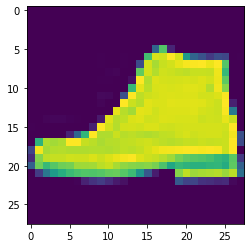

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Index of the images
index = 42

# Seteamos el número de caracteres por fila cuando lo printeamos
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'Label: {train_labels[index]}')
print(f'Image Array: {train_images[index]}')

## Visualize image
plt.imshow(train_images[index])

In [10]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or :rc:`image.interpolation`.

In [11]:
## Normalizamos los valores entre 0 y 1
train_images = train_images / np.max(train_images)
test_images = test_images /np.max(test_images)

In [13]:
## Build the classification model
from tensorflow import keras
model = keras.models.Sequential(
                    [
                        keras.layers.Flatten(),# shape of the input data
                        keras.layers.Dense(128, activation = tf.nn.relu),
                        keras.layers.Dense(10, activation = tf.nn.softmax) # shape of the classes
                    ]

)

In [14]:
## Sequential: That defines a sequence of layers in the neural network
## Flatten: Toma las imagenes que estan en matrices de 28*28 y lo transforma en 1-dimensinal array
## Dense: Add a layer network
## Relu: Pasa solo valores de 0 o mayores a 0 a la siguiente capa
##if x > 0: 
##  return x
##else: 
##  return 0
## Softmax: Softmax takes a list of values and scales these so the sum of all elements 
# will be equal to 1. When applied to model outputs, you can think of the scaled values as 
# the probability for that class. Examples:

# Declaramos algunos inputs de ejemplo y los transformamos a tensores
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the input to softmax activation function
outputs = keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs {sum}')

# Get the index of the highest value
prediction = np.argmax(outputs)
print(f'class with the highest probability: {prediction}')


input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs 1.0
class with the highest probability: 2


In [ ]:
from tensorflow import keras
# Creamos una red.
# Primero tenemos la capa inicial: input_data
# Luego tenemos la capa oculta
# Luego tenemos la capa final (tiene una neurona por cada clase)

In [15]:
print(tf.__version__)

2.7.0


In [18]:
# Construimos el modelo
# primero lo compilamos:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
# hacemos el fit del modelo
model.fit(train_images, train_labels, epochs=5)

2023-01-26 20:02:21.293150: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2824 - accuracy: 0.8956
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.8991
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9051: 0s - loss: 0.2570 - ac
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9080
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9105


In [19]:
## Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3416 - accuracy: 0.8806


[0.3416478633880615, 0.8805999755859375]

In [20]:
# Construimos el modelo
# primero lo compilamos: #Optimizamos el modelo con mas epochs
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
# hacemos el fit del modelo
model.fit(train_images, train_labels, epochs=10)

2023-01-26 20:04:19.349730: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2342 - accuracy: 0.9115
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2251 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2186 - accuracy: 0.9174
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2091 - accuracy: 0.9213
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2043 - accuracy: 0.9235
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1989 - accuracy: 0.9251
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1929 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1879 - accuracy: 0.9305
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1846 - accuracy: 0.9312
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.180

In [21]:
# Obtuvimos mejores métricas que en el caso anterior
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3626 - accuracy: 0.8844


[0.36264052987098694, 0.8844000101089478]

In [9]:
# Using callbacks to control training
### tf.keras.callbacks.Callback base class.
###You can create a callback by defining a class that inherits the tf.keras.callbacks.Callback base class. 
# From there, you can define available methods to set where the callback will be executed. For instance below, 
# you will use the on_epoch_end() method to check the loss at each training epoch.

class myCallback(keras.callbacks.Callback): # Clase que hereda de tf.keras.callbacks.Callback 
    def on_epoch_end(self, epoch, logs={}):
        """
        Halts the training after reach 60 percent accuracy

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from training epochs
        """

        # Check accuracy
        if(logs.get('loss')<0.4):

            # Stop if threshold is met
            print('\n Loss is lower than 0.4 so cancelling training!')
            self.model.stop_training = True

# Instantiate Class
callbacks = myCallback()

In [23]:
# Defino nuevamente el modelo
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

# Compilamos el modelo
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [24]:
# Train the model with a call back
model.fit(train_images, train_labels, epochs=10, callbacks = [callbacks])

2023-01-26 20:28:10.090421: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4759 - accuracy: 0.8302
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3595 - accuracy: 0.8680
 Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3595 - accuracy: 0.8681


In [ ]:
## Convolutional Neural Networks
### Looks for the most importance features
### La convolución es una especie de transformación que permite dar mayor enfasís o peso a ciertas variables.
### filtrando y comprimiendo: Para esto, definimos convolutional and pooling layers. At the top of the neurons.
### El objetivo de las convoluciones si simplemente reducir los features y quedarnos con las más importantes.
### Converting Deep Neural Network to Convolutional Neural Network by adding convolutional networks at the top

In [2]:
## convolutions and pooling
# Shallow Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

# Loading fashion_mnist dataset
fmnist = fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fmnist.load_data()

# Normalize the pixes values
train_images = train_images/255.0
test_images = test_images/255.0


In [3]:
# Define the model
model = keras.models.Sequential(
    [
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
    ]
)

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print('Model Training:\n')
model.fit(train_images, train_labels, epochs=5)

# Evaluate on the test set
print('Model Evaluation:\n')
test_loss = model.evaluate(test_images, test_labels)

2023-02-01 15:17:21.002630: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-01 15:17:21.002698: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ds-dev-ml-prepago-cash-in): /proc/driver/nvidia/version does not exist
2023-02-01 15:17:21.006868: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model Training:



2023-02-01 15:17:21.397639: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4945 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3754 - accuracy: 0.8637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3098 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2934 - accuracy: 0.8933
Model Evaluation:

313/313 [==============================] - 1s 1ms/step - loss: 0.3378 - accuracy: 0.8778


In [6]:
# Define the model
# Para añadir convoluciones se añaden convolutions and max pooling
model = keras.models.Sequential(
    [
        keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
        keras.layers.MaxPool2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPool2D(2,2),
        # Add the same layers as before
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
    ]
) 

# Print the model summary
print(model.summary())

# Use some setting
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train model
print('\n Train model')
model.fit(train_images, train_labels)

# Evaluate on test set
print('\n Model evaluation')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

2023-02-01 15:30:13.000935: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 120s 64ms/step - loss: 0.4351 - accuracy: 0.8438

 Model evaluation
313/313 [==============================] - 4s 11ms/step - loss: 0.3359 - accuracy: 0.8785


In [7]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


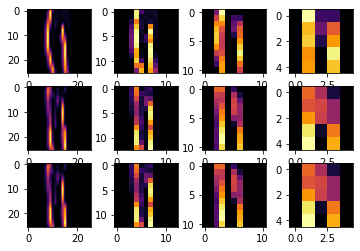

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE = 2
SECOND_IMAGE = 3
THIRD_IMAGE = 5
CONVOLUTION_NUMBER = 6

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0,:,:, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f2[0,:,:, CONVOLUTION_NUMBER], cmap = 'inferno')
    axarr[2,x].grid(False)

## Adding a callback to finish training when we get accuracy of: 
   - 0.88 

In [10]:
# Adding a callback to finish training when we get accuracy of:  0.88 
class myCallback(keras.callbacks.Callback): # Clase que hereda de tf.keras.callbacks.Callback 
    def on_epoch_end(self, epoch, logs={}):
        """
        Halts the training after reach 60 percent accuracy

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from training epochs
        """

        # Check accuracy
        if(logs.get('accuracy')>0.88):

            # Stop if threshold is met
            print('\n Accuracy is higher than 0.88 so cancelling training!')
            self.model.stop_training = True

# Instantiate Class
callbacks = myCallback()

In [14]:
# Use some setting
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

# Train model
print('\n Train model')
model.fit(train_images, train_labels, callbacks = [callbacks])

# Evaluate on test set
print('\n Model evaluation')
test_loss = model.evaluate(test_images, test_labels)


 Train model


2023-02-01 15:38:41.991901: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.8934
 Accuracy is higher than 0.88 so cancelling training!
1875/1875 [==============================] - 114s 61ms/step - loss: 0.2918 - accuracy: 0.8934

 Model evaluation
313/313 [==============================] - 3s 11ms/step - loss: 0.2842 - accuracy: 0.8935


## Exploring Convolutions
We are using ascent image

In [16]:
from scipy import misc

ascent_image = misc.ascent()

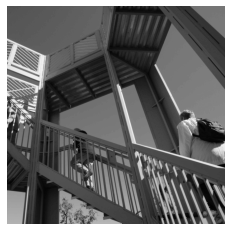

In [17]:
## drawing the image using matplotlib
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [39]:
type(ascent_image)
## the image is created in a numpy array. We are copying the array in a transformed_image variable
import numpy as np

# Copy the image to numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

Now we can create a filter 3*3

In [40]:
# Experiment with different values and see the effect
filters =  [[0, 1, 0],[1, -4, 1],[0, 1, 0]]

weight = 1

Now we can create a convolution. You will iterate over the image. leaving 1 pixel margin and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel´s neighbors above it and to the left will be multiplied by the top left item in the filter, etc.).

You´ll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally you´ll load the new value into transformed image.

In [41]:
# Iterate over the image
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1, y -1] *filters[0][0])
        convolution = convolution + (ascent_image[x-1, y] *filters[0][1])
        convolution = convolution + (ascent_image[x-1, y +1] *filters[0][2])
        convolution = convolution + (ascent_image[x, y -1] *filters[1][0])
        convolution = convolution + (ascent_image[x, y] * filters[1][1])
        convolution = convolution + (ascent_image[x, y+1] * filters[1][2])
        convolution = convolution + (ascent_image[x+1, y -1] *filters[2][0])
        convolution = convolution + (ascent_image[x+1, y] * filters[2][1])
        convolution = convolution + (ascent_image[x+1, y+1] * filters[2][2])
        
        # Multiply by weight
        convolution = convolution *weight
        
        # Check the boundaries of the pixels values
        if(convolution<0):
            convolution = 0
        if(convolution>255):
            convolution = 255
            
        # Load into transformed image
        image_transformed[x,y] = convolution

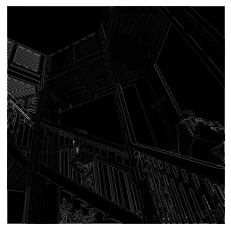

In [42]:
## drawing the image transformed using matplotlib
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image_transformed)
plt.show()

In [43]:
ascent_image[4, 4]

82

### Effect of Max Pooling
The next cell show a (2,2) pooling. The idea here is to iterate over the image, and look at the pixel and its immediate neighbors to the right, beneath, right-beneath. It will take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You´ll see that the features get maintained depide the compresion

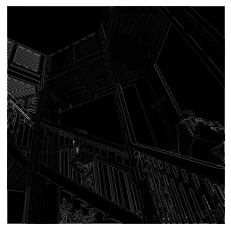

In [55]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank images with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        
        # Store all te pixel values in (2,2) pool
        pixels = []
        pixels.append(image_transformed[x,y])
        pixels.append(image_transformed[x+1,y])
        pixels.append(image_transformed[x,y+1])
        pixels.append(image_transformed[x+1,y+1])
        
        # Get only the largest value and assign the reduced image
        newImage[int(x/2), int(y/2)] = max(pixels)

# Plot the new image
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(image_transformed)
plt.show()